In [33]:
# Movie 1 distance to swarm vs. time.
#
# Avneet 20/6/18
import numpy as np
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt

pos_fp = "Movie_1_spot_coord_Position.csv"
sc_fp = "Movie_1_swarm_centre_Position.csv"

pos= pandas.read_csv (pos_fp)
sc= pandas.read_csv (sc_fp)

In [3]:
print(pos)


      Position X  Position Y  Position Z Unit Category Collection  Time  \
0         29.191     386.917      81.645   um     Spot   Position     1   
1         28.392     385.123      82.721   um     Spot   Position     2   
2         25.139     370.998      84.515   um     Spot   Position     3   
3         22.829     363.677      87.089   um     Spot   Position     4   
4         24.586     359.982      92.030   um     Spot   Position     5   
5         23.727     357.739      93.631   um     Spot   Position     6   
6         25.314     356.646      94.406   um     Spot   Position     7   
7         25.083     347.339      93.165   um     Spot   Position     8   
8         21.243     345.952      93.476   um     Spot   Position     9   
9         23.251     340.613      93.886   um     Spot   Position    10   
10        27.314     335.106      85.619   um     Spot   Position    11   
11        27.378     335.750      86.089   um     Spot   Position    12   
12        27.330     335.

In [7]:
pos_t1 = pos.loc[pos['Time'] == 1]
parents_keep = pos_t1["Parent"]
pos_parents_t1 = pos.loc[pos['Parent'].isin(parents_keep)]

In [8]:
print(pos_parents_t1)

      Position X  Position Y  Position Z Unit Category Collection  Time  \
0         29.191     386.917      81.645   um     Spot   Position     1   
1         28.392     385.123      82.721   um     Spot   Position     2   
2         25.139     370.998      84.515   um     Spot   Position     3   
3         22.829     363.677      87.089   um     Spot   Position     4   
4         24.586     359.982      92.030   um     Spot   Position     5   
5         23.727     357.739      93.631   um     Spot   Position     6   
6         25.314     356.646      94.406   um     Spot   Position     7   
7         25.083     347.339      93.165   um     Spot   Position     8   
8         21.243     345.952      93.476   um     Spot   Position     9   
9         23.251     340.613      93.886   um     Spot   Position    10   
10        27.314     335.106      85.619   um     Spot   Position    11   
11        27.378     335.750      86.089   um     Spot   Position    12   
12        27.330     335.

In [9]:
print(sc)

   Position X  Position Y  Position Z Unit Category Collection  Time  ID  \
0     117.264     123.853       100.5   um     Spot   Position     1   0   

   Unnamed: 8  
0         NaN  


In [29]:
pos_parents_t1["sc_x"] = sc["Position X"].at[0]
pos_parents_t1["sc_y"] = sc["Position Y"].at[0]
pos_parents_t1["sc_z"] = sc["Position Z"].at[0]

pos_parents_t1["dx"] = pos_parents_t1["Position X"] - pos_parents_t1["sc_x"]
pos_parents_t1["dy"] = pos_parents_t1["Position Y"] - pos_parents_t1["sc_y"]
pos_parents_t1["dz"] = pos_parents_t1["Position Z"] - pos_parents_t1["sc_z"]

pos_parents_t1["dx2"] = pos_parents_t1["dx"] * pos_parents_t1["dx"]
pos_parents_t1["dy2"] = pos_parents_t1["dy"] * pos_parents_t1["dy"]
pos_parents_t1["dz2"] = pos_parents_t1["dz"] * pos_parents_t1["dz"]

pos_parents_t1["dsc"] = np.sqrt(pos_parents_t1["dx2"] + pos_parents_t1["dy2"] + pos_parents_t1["dz2"])
print(pos_parents_t1)



      Position X  Position Y  Position Z Unit Category Collection  Time  \
0         29.191     386.917      81.645   um     Spot   Position     1   
1         28.392     385.123      82.721   um     Spot   Position     2   
2         25.139     370.998      84.515   um     Spot   Position     3   
3         22.829     363.677      87.089   um     Spot   Position     4   
4         24.586     359.982      92.030   um     Spot   Position     5   
5         23.727     357.739      93.631   um     Spot   Position     6   
6         25.314     356.646      94.406   um     Spot   Position     7   
7         25.083     347.339      93.165   um     Spot   Position     8   
8         21.243     345.952      93.476   um     Spot   Position     9   
9         23.251     340.613      93.886   um     Spot   Position    10   
10        27.314     335.106      85.619   um     Spot   Position    11   
11        27.378     335.750      86.089   um     Spot   Position    12   
12        27.330     335.

/Users/markread/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


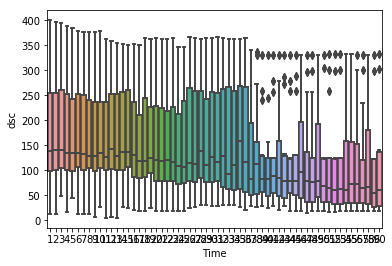

In [34]:
sns.boxplot(x="Time",y="dsc",data=pos_parents_t1)
plt.show()